In [11]:
# Dependencies
import os
import requests
import json
import pprint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import hvplot.pandas
import plotly.express as px


In [12]:
buildings_df = pd.read_csv('..//Resources/ETL_Dataset.csv')
buildings_df.head()

B_HashedKey                                    B_FullName  \
0  7276178987180364258  31 Joseph Street, Blackburn North, VIC, 3130   
1  7276178987180364258  31 Joseph Street, Blackburn North, VIC, 3130   
2  7276178987180364258  31 Joseph Street, Blackburn North, VIC, 3130   
3  7276178987180364258  31 Joseph Street, Blackburn North, VIC, 3130   
4  7276178987180364258  31 Joseph Street, Blackburn North, VIC, 3130   

  B_ShortName   B_StreetAddress         B_Suburb  B_PostCode B_State  \
0         NaN  31 Joseph Street  Blackburn North        3130     VIC   
1         NaN  31 Joseph Street  Blackburn North        3130     VIC   
2         NaN  31 Joseph Street  Blackburn North        3130     VIC   
3         NaN  31 Joseph Street  Blackburn North        3130     VIC   
4         NaN  31 Joseph Street  Blackburn North        3130     VIC   

        B_Geocode  B_Longitude  B_Latitude  ...  CRT_Nabers_AnnualConsumption  \
0  GAVIC425495402   145.146133  -37.800669  ...                     8994400.8   
1  GAVIC425495402   145.146133  -37.800669  ...                    11648467.6   
2  GAVIC425495402   145.146133  -37.800669  ...                     8994400.8   
3  GAVIC425495402   145.146133  -37.800669  ...                    11648467.6   
4  GAVIC425495402   145.146133  -37.800669  ...                     8994400.8   

           CRT_Nabers_OwnerName  \
0  Yarra Group Holdings Pty Ltd   
1  Yarra Group Holdings Pty Ltd   
2  Yarra Group Holdings Pty Ltd   
3  Yarra Group Holdings Pty Ltd   
4  Yarra Group Holdings Pty Ltd   

                                            TLA_Name  \
0  31 Joseph Street, Blackburn North, VIC, 3130 -...   
1  31 Joseph Street, Blackburn North, VIC, 3130 -...   
2  31 Joseph Street, Blackburn North, VIC, 3130 -...   
3  31 Joseph Street, Blackburn North, VIC, 3130 -...   
4  31 Joseph Street, Blackburn North, VIC, 3130 -...   

             TLA_AssessorName  TLA_NetLettableSpace  \
0  Alex Hardingham - CBDA0389                8553.1   
1  Alex Hardingham - CBDA0389                8553.1   
2  Alex Hardingham - CBDA0389                8553.1   
3  Alex Hardingham - CBDA0389                8553.1   
4  Alex Hardingham - CBDA0389                8553.1   

                       FS_Name  FS_Level  FS_NLA  CRT_BuildingNla  \
0   Part Ground Level - Retail       0.0   315.4           8553.1   
1   Part Ground Level - Retail       0.0   315.4           8717.6   
2  Part Ground Level - Suite 1       0.0   381.1           8553.1   
3  Part Ground Level - Suite 1       0.0   381.1           8717.6   
4  Part Ground Level - Suite 2       0.0   254.6           8553.1   

  CRT_NumberOfLevels  
0                3.0  
1                3.0  
2                3.0  
3                3.0  
4                3.0  

[5 rows x 28 columns]

In [13]:
filtered_df = buildings_df[['CRT_Nabers_AnnualConsumption', 'TLA_NetLettableSpace']]
filtered_df


CRT_Nabers_AnnualConsumption  TLA_NetLettableSpace
0                         8994400.8                8553.1
1                        11648467.6                8553.1
2                         8994400.8                8553.1
3                        11648467.6                8553.1
4                         8994400.8                8553.1
...                             ...                   ...
40838                     4171236.3                8307.5
40839                     3679832.0                8307.5
40840                     4171236.3                8307.5
40841                     3679832.0                8307.5
40842                     4171236.3                8307.5

[40843 rows x 2 columns]

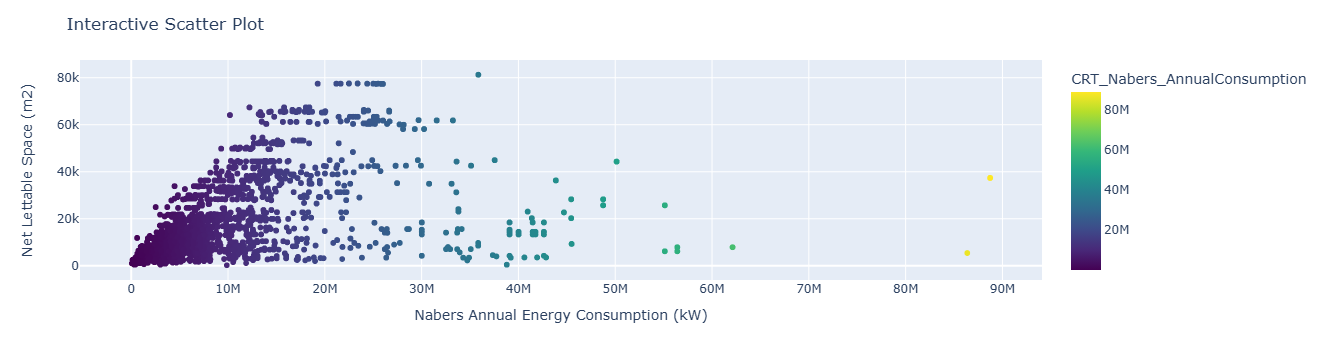

In [14]:
x_variable = 'CRT_Nabers_AnnualConsumption'
y_variable = 'TLA_NetLettableSpace'
color_variable = 'CRT_Nabers_AnnualConsumption'

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(filtered_df, x=x_variable, y=y_variable, color=color_variable, 
                 color_continuous_scale='Viridis', hover_name=filtered_df.index)

# Update layout for better visualization
fig.update_layout(title='Interactive Scatter Plot', xaxis_title='Nabers Annual Energy Consumption (kWh)', yaxis_title='Net Lettable Space (m2)')

# Show the interactive plot
fig.show()



In [15]:
filtered_bar_df = buildings_df[['FS_NLA', 'TLA_NetLettableSpace']]
filtered_bar_df

FS_NLA  TLA_NetLettableSpace
0       315.4                8553.1
1       315.4                8553.1
2       381.1                8553.1
3       381.1                8553.1
4       254.6                8553.1
...       ...                   ...
40838   652.5                8307.5
40839   209.6                8307.5
40840   209.6                8307.5
40841   321.0                8307.5
40842   321.0                8307.5

[40843 rows x 2 columns]

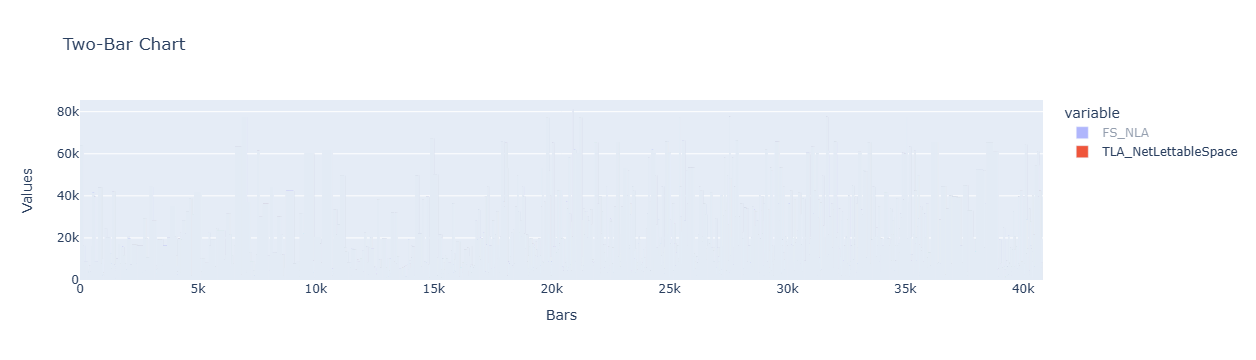

In [22]:
x_variable = 'FS_NLA'
y_variable = 'TLA_NetLettableSpace'
color_variable = 'FS_NLA'

fig = px.bar(filtered_bar_df, x=filtered_bar_df.index, y=['FS_NLA', 'TLA_NetLettableSpace'], barmode='group', title='Two-Bar Chart')
fig.update_layout(xaxis={'title': 'Bars'}, yaxis={'title': 'Values'})
fig.show()